In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Load and Prepare the Iris Dataset**

We use the **Iris dataset**, a classic multiclass classification problem, with 150 samples and 4 features:
- Sepal length, Sepal width, Petal length, Petal width

The goal is to classify iris flowers into 3 species:
- Setosa, Versicolor, Virginica

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

**Train-Test Split**

We split the data into 80% training and 20% testing.  
Stratified sampling ensures each class is proportionally represented in both sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Train Support Vector Machine (Linear Kernel)**

We train a **linear SVM classifier** using `SVC(kernel='linear')`.

Linear SVM tries to find a straight-line (or hyperplane in higher dimensions) that best separates the classes by maximizing the margin between the closest points (support vectors).

In [4]:
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(X_train, y_train)


SVC(kernel='linear')

**Evaluate Linear Kernel SVM**

We evaluate model performance using:
- **Accuracy**: overall performance
- **Classification report**: precision, recall, and F1-score per class

In [5]:
y_pred_linear = svm_model_linear.predict(X_test)


In [6]:
print("Accuracy (Linear Kernel):", accuracy_score(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

Accuracy (Linear Kernel): 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Confusion Matrix (Linear Kernel)**

We plot a confusion matrix to visualize true vs. predicted class distributions.  
A perfect model will have all values on the diagonal.

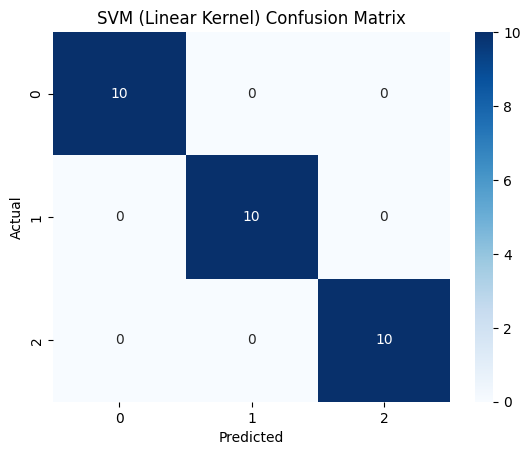

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("SVM (Linear Kernel) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Train Support Vector Machine (RBF Kernel)**

We now use `SVC(kernel='rbf')`, which maps data to a higher-dimensional space using a radial basis function (RBF).

This allows the model to **separate classes that are not linearly separable** in the original feature space.

In [9]:
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)

SVC()

In [10]:
y_pred_rbf = svm_model_rbf.predict(X_test)

print("Accuracy (RBF Kernel):", accuracy_score(y_test, y_pred_rbf))


Accuracy (RBF Kernel): 0.9666666666666667


**Compare Accuracy of Linear vs RBF Kernel**

We now compare the accuracy of both kernels on the Iris dataset:

- **Linear SVM Accuracy:** 100%
- **RBF SVM Accuracy:** 96%

Why is Linear SVM better here?

- The Iris dataset is **well-separated linearly**, especially between setosa and other classes.
- A linear hyperplane is sufficient to classify the points perfectly.
- The RBF kernel adds unnecessary complexity, which slightly hurts performance here.

Conclusion

- When the data is already linearly separable, a **linear SVM not only performs better but is also faster and simpler**.  
- RBF SVM is more powerful in general, but it shines when the decision boundary is **non-linear**.

This highlights the importance of **understanding your data distribution** before choosing the kernel.


In [11]:
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy   :", accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy   : 0.9666666666666667
